### 데이터 변환

In [3]:
import os
print("현재 경로:", os.getcwd())


현재 경로: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집


In [4]:
import os

DATA_PATH = os.path.join(os.getcwd(), '..', 'gesture_data')
gestures = ['fire', 'shot', 'nono', 'hit', 'hi', 'nyan', 'none']

for label in gestures:
    file_path = os.path.join(DATA_PATH, f"{label}.npy")
    if os.path.exists(file_path):
        print(f"✅ 존재함: {file_path}")
    else:
        print(f"❌ 없음: {file_path}")


✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\..\gesture_data\fire.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\..\gesture_data\shot.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\..\gesture_data\nono.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\..\gesture_data\hit.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\..\gesture_data\hi.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\..\gesture_data\nyan.npy
✅ 존재함: c:\Users\SSAFY\Desktop\daramstudy\ImageAnalysis\손 동적 모델 data 수집\..\gesture_data\none.npy


In [5]:
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

DATA_PATH = os.path.join(os.getcwd(), '..', 'gesture_data')
gestures = ['fire', 'shot', 'nono', 'hit', 'hi', 'nyan', 'none']

X = []
y = []

# 각 제스처 파일 로드
for label in gestures:
    file_path = os.path.join(DATA_PATH, f"{label}.npy")
    sequences = np.load(file_path)  # shape: (n_sequences, 30, 63)
    
    X.extend(sequences)
    y.extend([label] * len(sequences))  # 각 sequence에 해당 라벨 추가

X = np.array(X)
y = np.array(y)

# 라벨 인코딩 (문자 → 숫자 → 원-핫 벡터)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

print("✅ X shape:", X.shape)  # (전체 sequence 개수, 30, 63)
print("✅ y shape:", y_categorical.shape)  # (전체 sequence 개수, 클래스 수)


✅ X shape: (2403, 30, 63)
✅ y shape: (2403, 7)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, shuffle=True
)

# 모델 정의
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 63)))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(gestures), activation='softmax'))  # 클래스 수 = 6

# 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# 저장
model.save('gesture_rnn_model2.h5')
print("✅ 모델 저장 완료: gesture_rnn_model12.h5")


Epoch 1/30


c:\Users\SSAFY\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2392 - loss: 1.8575 - val_accuracy: 0.3534 - val_loss: 1.6667
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4281 - loss: 1.6175 - val_accuracy: 0.6008 - val_loss: 1.1947
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5952 - loss: 1.4047 - val_accuracy: 0.6237 - val_loss: 1.1229
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6797 - loss: 1.0063 - val_accuracy: 0.6881 - val_loss: 0.7071
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7471 - loss: 0.6681 - val_accuracy: 0.7942 - val_loss: 0.5978
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7826 - loss: 0.5713 - val_accuracy: 0.7152 - val_loss: 4.6287
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7637 - loss: 0.8227 - val_accuracy: 0.8815 - val_loss: 0.4058
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8774 - loss: 0.4691 - val_accuracy: 0.8191 - val_loss: 0.

✅ 모델 저장 완료: gesture_rnn_model12.h5


In [7]:
import tensorflow as tf

model = tf.keras.models.load_model('gesture_rnn_model2.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

# ⚠️ 핵심 옵션들 추가
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # 기본 TFLite 연산
    tf.lite.OpsSet.SELECT_TF_OPS     # TF 연산 일부 허용
]
converter._experimental_lower_tensor_list_ops = False

# 변환
tflite_model = converter.convert()

# 저장
with open('gesture_rnn_model1.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\SSAFY\AppData\Local\Temp\tmp0hpp2v47\assets


INFO:tensorflow:Assets written to: C:\Users\SSAFY\AppData\Local\Temp\tmp0hpp2v47\assets


Saved artifact at 'C:\Users\SSAFY\AppData\Local\Temp\tmp0hpp2v47'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 63), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  1933488883136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1933471766784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1933488891408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1933494550224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1933494548992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1933494547408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1933494591808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1933494592512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1933494598848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1933494590576: TensorSpec(shape=(), dtype=tf.resource, name=None)


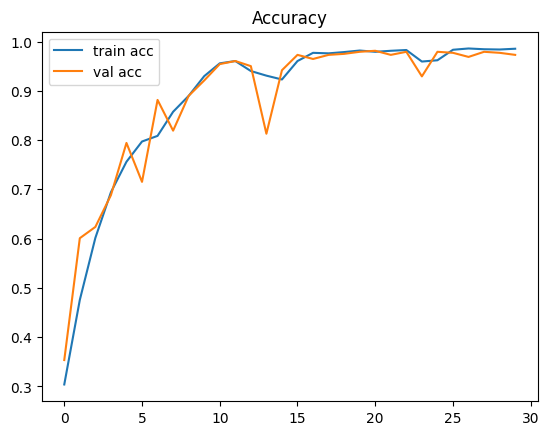

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()
